In [2]:
!git clone https://github.com/orronai/MRIBTCPB.git

Cloning into 'MRIBTCPB'...
remote: Enumerating objects: 6886, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 6886 (delta 82), reused 88 (delta 50), pack-reused 6765
Receiving objects: 100% (6886/6886), 184.26 MiB | 14.52 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Updating files: 100% (7040/7040), done.


In [4]:
!pip install kornia
!pip install optuna
!pip install efficientnet_pytorch

In [5]:
from MRIBTCPB.code.train import train_model
from MRIBTCPB.code.optuna_train import run_experiments

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [6]:
model_name = 'densenet201'
fine_tune=True
densenet201_params = run_experiments(model_name, fine_tune)

[I 2023-06-16 16:18:26,437] A new study created in memory with name: patch-mri-classification
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 42.4MB/s]
100%|██████████| 12/12 [01:48<00:00,  9.00s/it]
[I 2023-06-16 16:20:21,939] Trial 0 finished with value: 0.8 and parameters: {'num_patches': 49, 'lr': 0.0008408292234724221, 'optimizer': 'SGD', 'scheduler': 'CosineAnnealingLR', 'batch_size': 8}. Best is trial 0 with value: 0.8.
100%|██████████| 12/12 [01:41<00:00,  8.47s/it]
[I 2023-06-16 16:22:04,206] Trial 1 finished with value: 0.9125 and parameters: {'num_patches': 4, 'lr': 2.0979421087384535e-05, 'optimizer': 'Adam', 'scheduler': 'StepLR', 'batch_size': 16}. Best is trial 1 with value: 0.9125.
100%|██████████| 12/12 [02:47<00:00, 13.99s/it]
[I 2023-06-16 16:24:52,692] Trial 2 finished with value: 0.6875 and parameters: {'num_patches': 4, 'lr': 0.0046

Study statistics: 
  Number of finished trials:  50
  Number of pruned trials:  35
  Number of complete trials:  15
Best trial:
  Value:  0.959375
  Params: 
    num_patches: 4
    lr: 5.577485824001339e-05
    optimizer: RMSprop
    scheduler: StepLR
    batch_size: 32


In [ ]:
train_model(model_name, augmentation=False, fine_tune=fine_tune, **densenet201_params)

[INFO]: Number of training images: 4571
[INFO]: Number of validation images: 1141
[INFO]: Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']

Computation device: cuda
Learning rate: 5.577485824001339e-05
Epochs to train for: 30

18,123,652 total parameters.
18,123,652 training parameters.
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 1 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.53it/s]


Training loss: 0.282, training acc: 89.958
Validation loss: 0.140, validation acc: 95.092
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 2 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.06it/s]


Training loss: 0.030, training acc: 99.497
Validation loss: 0.209, validation acc: 93.514
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 3 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.17it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.21it/s]


Training loss: 0.013, training acc: 99.737
Validation loss: 0.131, validation acc: 95.180
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 4 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.22it/s]


Training loss: 0.008, training acc: 99.934
Validation loss: 0.161, validation acc: 95.004
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 5 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.17it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.40it/s]


Training loss: 0.010, training acc: 99.672
Validation loss: 0.147, validation acc: 95.968
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 6 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.54it/s]


Training loss: 0.007, training acc: 99.847
Validation loss: 0.145, validation acc: 95.968
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 7 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.19it/s]


Training loss: 0.013, training acc: 99.694
Validation loss: 0.193, validation acc: 95.530
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 8 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.05it/s]


Training loss: 0.004, training acc: 99.891
Validation loss: 0.171, validation acc: 95.355
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 9 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.78it/s]


Training loss: 0.015, training acc: 99.497
Validation loss: 0.186, validation acc: 94.654
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 10 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.16it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.25it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.149, validation acc: 96.144
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 14 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.65it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.137, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 15 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.33it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.149, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 16 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.16it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.29it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.145, validation acc: 96.582
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 17 of 30

Training


 96%|█████████▌| 137/143 [00:43<00:01,  3.23it/s]

Training loss: 0.000, training acc: 100.000
Validation loss: 0.158, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 20 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.17it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.25it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.166, validation acc: 96.231
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 21 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.17it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.23it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.162, validation acc: 96.407
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 22 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.11it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.160, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 23 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.34it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.157, validation acc: 96.407
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 24 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.18it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.162, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 25 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.18it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.52it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.159, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 28 of 30

Training


100%|██████████| 143/143 [00:44<00:00,  3.19it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.24it/s]


Training loss: 0.000, training acc: 100.000
Validation loss: 0.160, validation acc: 96.319
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 29 of 30

Training


100%|██████████| 143/143 [00:45<00:00,  3.16it/s]


Validation



 75%|███████▌  | 27/36 [00:04<00:01,  5.43it/s]

[INFO]: Number of training images: 4571
[INFO]: Number of validation images: 1141
[INFO]: Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']

Computation device: cuda
Learning rate: 5.577485824001339e-05
Epochs to train for: 30

18,123,652 total parameters.
18,123,652 training parameters.
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 1 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.11it/s]


Training loss: 0.399, training acc: 84.861
Validation loss: 0.207, validation acc: 93.076
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 2 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.38it/s]


Training loss: 0.163, training acc: 94.487
Validation loss: 0.159, validation acc: 93.953
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 3 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.78it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.49it/s]


Training loss: 0.124, training acc: 95.996
Validation loss: 0.111, validation acc: 95.968
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 4 of 30

Training


100%|██████████| 143/143 [00:50<00:00,  2.81it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.19it/s]


Training loss: 0.100, training acc: 96.347
Validation loss: 0.134, validation acc: 95.793
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 5 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.34it/s]


Training loss: 0.070, training acc: 97.769
Validation loss: 0.102, validation acc: 96.582
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 6 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.74it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.99it/s]


Training loss: 0.081, training acc: 97.243
Validation loss: 0.097, validation acc: 96.757
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 7 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.23it/s]


Training loss: 0.071, training acc: 97.484
Validation loss: 0.091, validation acc: 96.933
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 8 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.78it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.54it/s]


Training loss: 0.057, training acc: 97.987
Validation loss: 0.125, validation acc: 95.881
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 9 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.77it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.95it/s]


Training loss: 0.054, training acc: 98.228
Validation loss: 0.077, validation acc: 97.108
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-05.
[INFO]: Epoch 10 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.79it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.23it/s]


Training loss: 0.050, training acc: 98.294
Validation loss: 0.079, validation acc: 97.371
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 11 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.29it/s]


Training loss: 0.042, training acc: 98.731
Validation loss: 0.067, validation acc: 97.634
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 12 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.37it/s]


Training loss: 0.033, training acc: 98.862
Validation loss: 0.063, validation acc: 97.984
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 13 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.31it/s]


Training loss: 0.032, training acc: 98.841
Validation loss: 0.066, validation acc: 98.072
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 14 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.62it/s]


Training loss: 0.028, training acc: 99.234
Validation loss: 0.064, validation acc: 98.247
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 15 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.79it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.29it/s]


Training loss: 0.031, training acc: 99.037
Validation loss: 0.061, validation acc: 97.984
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 16 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.74it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.14it/s]


Training loss: 0.028, training acc: 99.016
Validation loss: 0.063, validation acc: 97.897
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 17 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.77it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.17it/s]


Training loss: 0.028, training acc: 98.972
Validation loss: 0.059, validation acc: 98.072
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 18 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.13it/s]


Training loss: 0.026, training acc: 99.016
Validation loss: 0.061, validation acc: 98.072
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 19 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.39it/s]


Training loss: 0.020, training acc: 99.256
Validation loss: 0.058, validation acc: 98.422
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-06.
[INFO]: Epoch 20 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.78it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.63it/s]


Training loss: 0.020, training acc: 99.344
Validation loss: 0.063, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 21 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.79it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.34it/s]


Training loss: 0.017, training acc: 99.584
Validation loss: 0.065, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 22 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.76it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.33it/s]


Training loss: 0.022, training acc: 99.322
Validation loss: 0.062, validation acc: 98.335
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 23 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.74it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.99it/s]


Training loss: 0.025, training acc: 98.972
Validation loss: 0.061, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 24 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.77it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.23it/s]


Training loss: 0.018, training acc: 99.322
Validation loss: 0.058, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 25 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.78it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.65it/s]


Training loss: 0.019, training acc: 99.409
Validation loss: 0.060, validation acc: 98.335
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 26 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.73it/s]


Validation



100%|██████████| 36/36 [00:06<00:00,  5.89it/s]


Training loss: 0.015, training acc: 99.606
Validation loss: 0.056, validation acc: 98.247
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 27 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.71it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.22it/s]


Training loss: 0.019, training acc: 99.431
Validation loss: 0.057, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 28 of 30

Training


100%|██████████| 143/143 [00:52<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.25it/s]


Training loss: 0.020, training acc: 99.366
Validation loss: 0.058, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 29 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.04it/s]


Training loss: 0.021, training acc: 99.300
Validation loss: 0.058, validation acc: 98.335
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-07.
[INFO]: Epoch 30 of 30

Training


100%|██████████| 143/143 [00:51<00:00,  2.75it/s]


Validation



100%|██████████| 36/36 [00:05<00:00,  6.20it/s]


Training loss: 0.018, training acc: 99.366
Validation loss: 0.056, validation acc: 98.160
--------------------------------------------------
Adjusting learning rate of group 0 to 5.5775e-08.
TRAINING COMPLETE
test accuracy: 98.474%


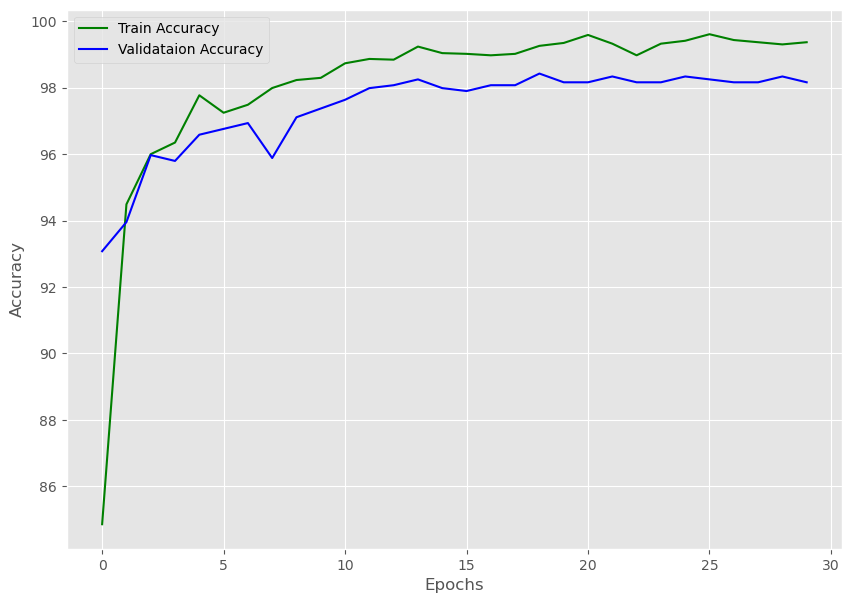

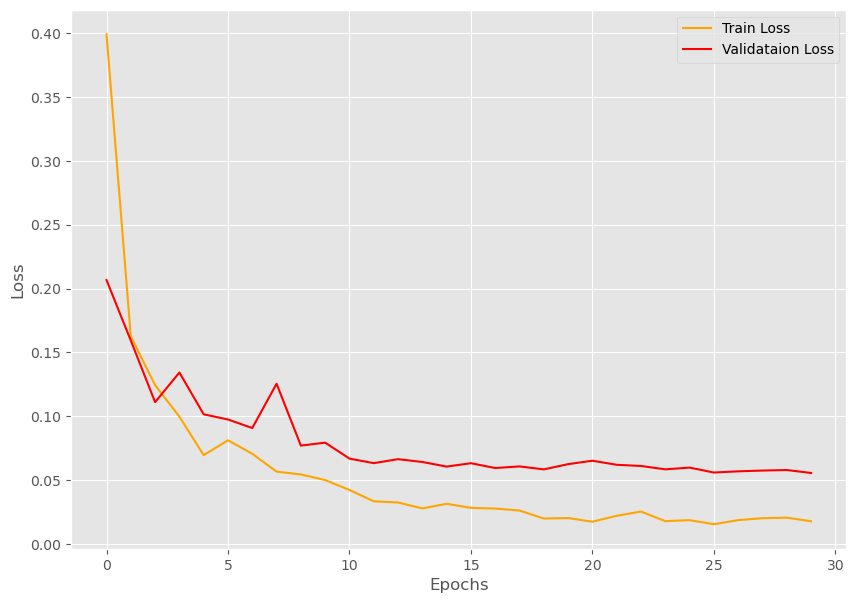

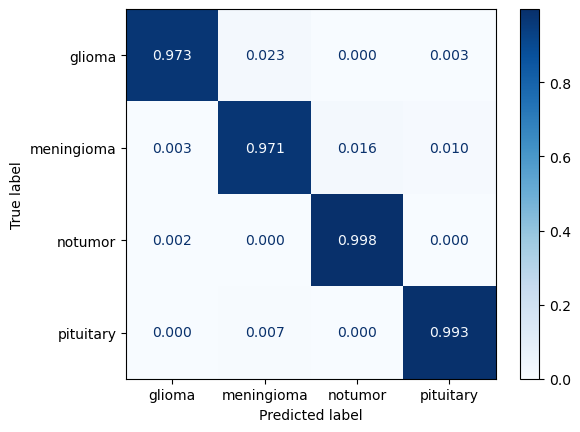

In [7]:
train_model(model_name, augmentation=True, fine_tune=fine_tune, **densenet201_params)